# Predict Turnout 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [2]:
ec = pd.read_csv(r"C:\Users\param/loksabha_1962-2019.csv")
print('Data read successfully')

Data read successfully


In [3]:
ec.head()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,"4,04,283","2,20,383",54.5 %,"89,085",40.40%,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,"4,19,077","2,52,379",60.2 %,"33,022",13.10%,1962.0
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,"4,33,164","2,75,663",63.6 %,"54,351",19.70%,1962.0
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,"4,33,392","2,70,346",62.4 %,"21,592",8.00%,1962.0
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,"4,03,913","2,22,091",55.0 %,"14,038",6.30%,1962.0


In [4]:
ec.tail()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
8042,Wardha,8,GEN,Maharashtra,Ramdas Chandrabhanji Tadas,Bharatiya Janta Party,"16,79,788","10,72,570",64.2 %,"1,87,191",17.50%,2019.0
8043,Wayanad,4,GEN,Kerala,Rahul Gandhi,Indian National Congress,"13,06,141","10,92,197",83.8 %,"4,31,770",39.50%,2019.0
8044,West Delhi,6,GEN,Delhi [1977 Onwards],Sant Prasad Sinha,Bharatiya Janta Party,"20,39,410","14,41,601",71.1 %,"5,78,486",40.10%,2019.0
8045,Yavatmal-Washi,14,GEN,Maharashtra,Bhavana Pundlikrao Gawali,Shiv Sena,"18,12,059","11,74,220",65.0 %,"1,17,939",10.00%,2019.0
8046,Zahirabad,5,GEN,Telangana,B.B.Patil,Telangana Rashtra Samithi,"14,11,026","10,44,365",74.8 %,"6,229",0.60%,2019.0


In [5]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pc_name         8047 non-null   object 
 1   no              8047 non-null   object 
 2   type            8015 non-null   object 
 3   state           8047 non-null   object 
 4   candidate_name  8047 non-null   object 
 5   party           8047 non-null   object 
 6   electors        8047 non-null   object 
 7   votes           8047 non-null   object 
 8   Turnout         8033 non-null   object 
 9   margin          8047 non-null   object 
 10  margin%         8032 non-null   object 
 11  year            8046 non-null   float64
dtypes: float64(1), object(11)
memory usage: 754.5+ KB


In [6]:
ec.shape

(8047, 12)

In [7]:
ec.columns

Index(['Pc_name', 'no', 'type', 'state', 'candidate_name', 'party', 'electors',
       'votes', 'Turnout', 'margin', 'margin%', 'year'],
      dtype='object')

In [8]:
ec.isnull().sum()

Pc_name            0
no                 0
type              32
state              0
candidate_name     0
party              0
electors           0
votes              0
Turnout           14
margin             0
margin%           15
year               1
dtype: int64

## Data Cleaning 

In [9]:
ec['type'] = ec['type'].fillna(ec['type'].mode()[0])

In [10]:
ec[ec["Turnout"].isnull()]

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
22,Angul,307,GEN,Orissa,Harekrushna Mahtab,Indian National Congress,"4,45,165",RU,NaN,RU,NaN,1962.0
454,Tehri Garhawal,360,GEN,Uttar Pradesh [1947 - 1999],Manabendra Shah,Indian National Congress,"4,15,051",RU,NaN,RU,NaN,1962.0
464,Tiruchendur,224,GEN,Madras,T. T. Krishnamachari,Indian National Congress,"4,60,766",RU,NaN,RU,NaN,1962.0
518,Anantnag,144,GEN,Jammu & Kashmir,M.S. Qureshi,Indian National Congress,1,RU,NaN,RU,NaN,1967.0
780,Kokrajhar,46,ST,Assam,R. Brahma,Indian National Congress,"4,15,618",RU,NaN,RU,NaN,1967.0
796,Ladakh,145,GEN,Jammu & Kashmir,K. Bakula,Indian National Congress,"51,381",RU,NaN,RU,NaN,1967.0
854,Nagaland,296,GEN,Nagaland,Chubatoshi,Nagaland Nationalist Organisation,"2,14,951",RU,NaN,RU,NaN,1967.0
1007,Vijayawada,13,GEN,Andhra Pradesh,K.L. Rao,Indian National Congress,"5,22,116",RU,NaN,RU,NaN,1967.0
1314,L M And A Islands,513,GEN,"Laccadive, Minicoy And Amindivi Islands",Sadanatha Mohammed Sayeed,Indian National Congress,"14,977",RU,NaN,RU,NaN,1971.0
1564,Arunachal West,1,GEN,Arunachal Pradesh,Rinchin Khandu Khimre,Indian National Congress,"1,21,887",RU,NaN,RU,NaN,1977.0


In [11]:
ec[ec["year"].isnull()]

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
3161,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,NaN,NaN


In [12]:
ec = ec.dropna(axis=0, subset=['Turnout', 'margin%', 'year'])

In [13]:
ec.isnull().sum()

Pc_name           0
no                0
type              0
state             0
candidate_name    0
party             0
electors          0
votes             0
Turnout           0
margin            0
margin%           0
year              0
dtype: int64

### Remove unwanted Signs 

In [14]:
ec['Turnout'] = ec['Turnout'].str.replace('%', '')
ec['margin%'] = ec['margin%'].str.replace('%', '')

In [15]:
ec.head()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,"4,04,283","2,20,383",54.5,"89,085",40.40,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,"4,19,077","2,52,379",60.2,"33,022",13.10,1962.0
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,"4,33,164","2,75,663",63.6,"54,351",19.70,1962.0
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,"4,33,392","2,70,346",62.4,"21,592",8.00,1962.0
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,"4,03,913","2,22,091",55.0,"14,038",6.30,1962.0


In [16]:
ec[ec["Turnout"] == '-']

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
1684,Daman And Diu,1,GEN,Daman & Diu,Data Not Available,-,-,-,-,-,-,1977.0
2112,Autonomous District,3,ST,Assam,Data Not Available,-,-,-,-,-,-,1980.0
2142,Barpeta,6,GEN,Assam,Data Not Available,-,-,-,-,-,-,1980.0
2227,Daman And Diu,1,GEN,Daman & Diu,Data Not Available,-,-,-,-,-,-,1980.0
2243,Dhubri,4,GEN,Assam,Data Not Available,-,-,-,-,-,-,1980.0
2246,Dibrugarh,13,GEN,Assam,Data Not Available,-,-,-,-,-,-,1980.0
2269,Gauhati,7,GEN,Assam,Data Not Available,-,-,-,-,-,-,1980.0
2333,Jorhat,12,GEN,Assam,Data Not Available,-,-,-,-,-,-,1980.0
2342,Kaliabor,11,GEN,Assam,Data Not Available,-,-,-,-,-,-,1980.0
2373,Kokrajhar,5,ST,Assam,Data Not Available,-,-,-,-,-,-,1980.0


In [17]:
ec = ec.drop(ec[ec['Turnout'] == '-'].index)

In [18]:
ec.shape

(7993, 12)

In [19]:
ec['electors'] = ec.electors.apply(lambda x: x.strip(','))

ec['electors'] = ec.electors.apply(lambda x: x.replace(',',''))

In [20]:
ec['votes'] = ec.votes.apply(lambda x: x.strip(','))

ec['votes'] = ec.votes.apply(lambda x: x.replace(',',''))

In [21]:
ec['margin'] = ec.margin.apply(lambda x: x.strip(','))

ec['margin'] = ec.margin.apply(lambda x: x.replace(',',''))

In [22]:
ec.head()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,404283,220383,54.5,89085,40.40,1962.0
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,419077,252379,60.2,33022,13.10,1962.0
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,433164,275663,63.6,54351,19.70,1962.0
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,433392,270346,62.4,21592,8.00,1962.0
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,403913,222091,55.0,14038,6.30,1962.0


### Change Datatypes 

In [23]:
ec['no'] = ec['no'].astype(int)
ec['electors'] = ec['electors'].astype(int)
ec['votes'] = ec['votes'].astype(int)
ec['Turnout'] = ec['Turnout'].astype(float)
ec['margin'] = ec['margin'].astype(int)
ec['margin%'] = ec['margin%'].astype(float)
ec['year'] = ec['year'].astype(int)

In [24]:
ec.dtypes

Pc_name            object
no                  int32
type               object
state              object
candidate_name     object
party              object
electors            int32
votes               int32
Turnout           float64
margin              int32
margin%           float64
year                int32
dtype: object

In [25]:
ec.describe()

,no,electors,votes,Turnout,margin,margin%,year
count,7993.000000,7.993000e+03,7.993000e+03,7993.000000,7993.000000,7993.000000,7993.000000
mean,65.447016,9.690611e+05,5.924035e+05,60.783886,85864.319029,15.457338,1991.022520
std,113.853143,4.201276e+05,2.916523e+05,12.268506,83855.296384,12.912857,16.473125
min,1.000000,1.450500e+04,1.189700e+04,5.100000,9.000000,0.000000,1962.000000
25%,9.000000,6.076130e+05,3.564460e+05,52.500000,26791.000000,5.500000,1977.000000
50%,21.000000,9.601240e+05,5.621950e+05,60.800000,61468.000000,12.100000,1991.000000
75%,44.000000,1.233063e+06,7.635260e+05,69.400000,117147.000000,22.400000,2004.000000
max,520.000000,3.368399e+06,1.763757e+06,108.100000,689668.000000,96.000000,2019.000000


In [26]:
ec.head()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,404283,220383,54.5,89085,40.4,1962
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,419077,252379,60.2,33022,13.1,1962
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,433164,275663,63.6,54351,19.7,1962
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,433392,270346,62.4,21592,8.0,1962
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,403913,222091,55.0,14038,6.3,1962


In [27]:
sns.set_style("darkgrid")

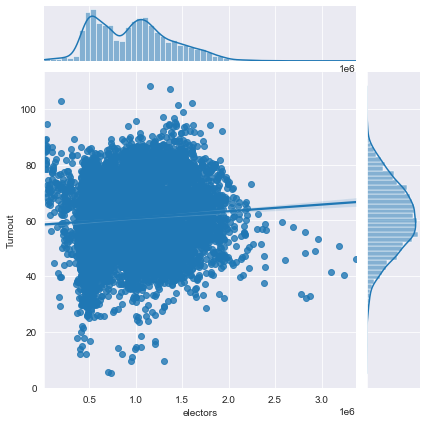

In [28]:
sns.jointplot('electors','Turnout', data=ec, kind='reg');

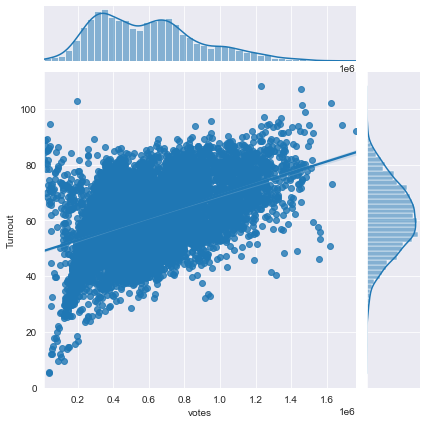

In [29]:
sns.jointplot('votes','Turnout', data=ec, kind='reg');

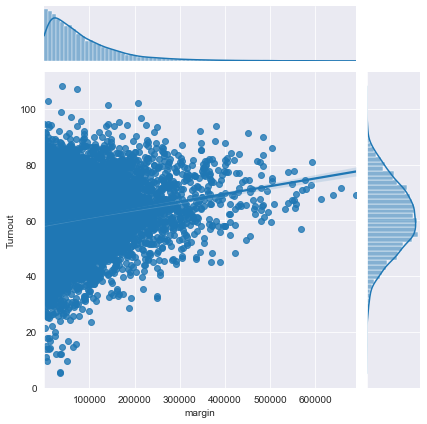

In [30]:
sns.jointplot('margin','Turnout', data=ec, kind='reg');

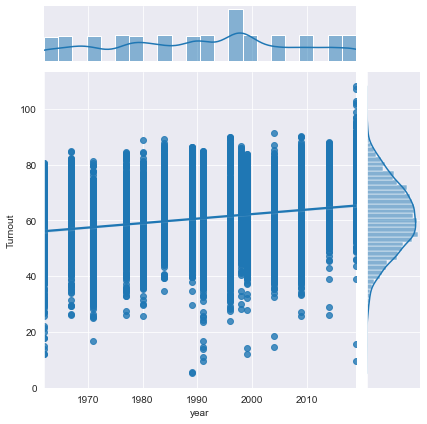

In [31]:
sns.jointplot('year','Turnout', data=ec, kind='reg');

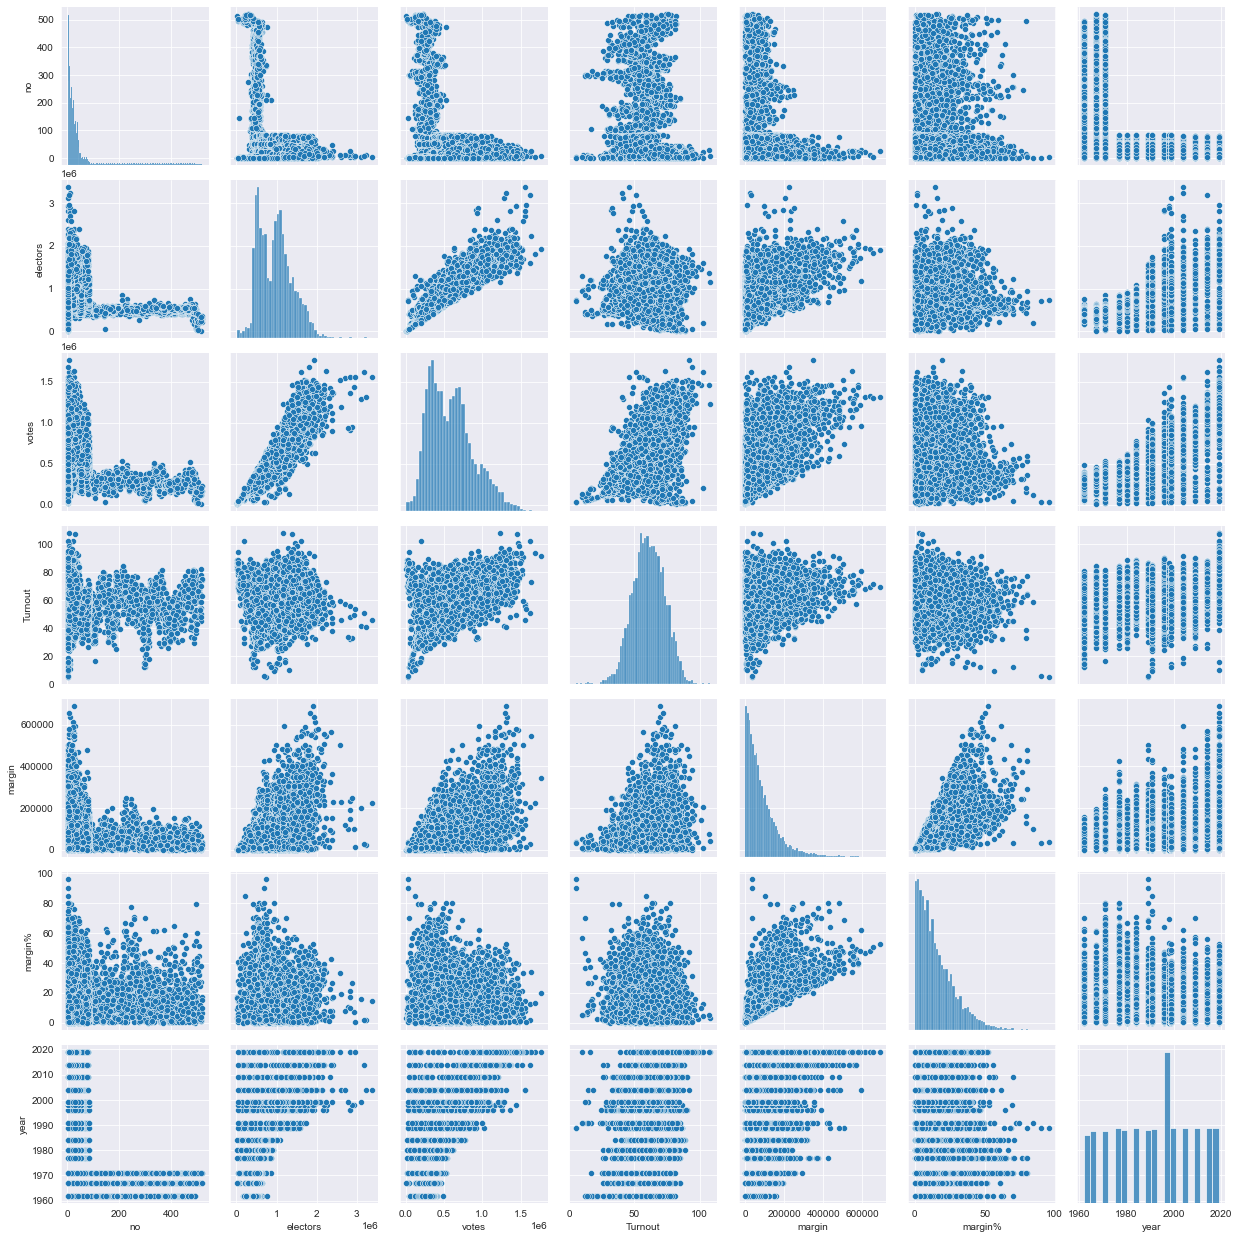

In [32]:
sns.pairplot(ec);

In [33]:
ec.corr()

,no,electors,votes,Turnout,margin,margin%,year
no,1.000000,-0.452905,-0.432851,-0.129180,-0.195630,0.041058,-0.585330
electors,-0.452905,1.000000,0.896089,0.082047,0.395300,-0.144853,0.859896
votes,-0.432851,0.896089,1.000000,0.479201,0.436127,-0.151585,0.836564
Turnout,-0.129180,0.082047,0.479201,1.000000,0.189252,-0.092733,0.216523
margin,-0.195630,0.395300,0.436127,0.189252,1.000000,0.712210,0.340396
margin%,0.041058,-0.144853,-0.151585,-0.092733,0.712210,1.000000,-0.162528
year,-0.585330,0.859896,0.836564,0.216523,0.340396,-0.162528,1.000000


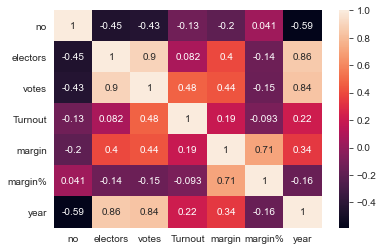

In [34]:
sns.heatmap(ec.corr(), annot=True);

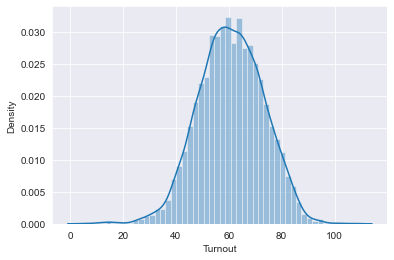

In [35]:
sns.distplot(ec['Turnout'])
plt.show()

In [36]:
ec.head()

,Pc_name,no,type,state,candidate_name,party,electors,votes,Turnout,margin,margin%,year
0,Adilabad,36,GEN,Andhra Pradesh,G. Narayan Reddy,Indian National Congress,404283,220383,54.5,89085,40.4,1962
1,Adoni,27,GEN,Andhra Pradesh,Pendekanti Venkatasubbaiah,Indian National Congress,419077,252379,60.2,33022,13.1,1962
2,Agra,433,GEN,Uttar Pradesh [1947 - 1999],Seth Achal Singh,Indian National Congress,433164,275663,63.6,54351,19.7,1962
3,Ahmedabad,120,GEN,Gujarat,Indulal Kanaiyalal Yagnik,Nutan Maha Gujarat Janta Parisha,433392,270346,62.4,21592,8.0,1962
4,Ahmednagar,245,GEN,Maharashtra,Motilal Kundanmal Firodya,Indian National Congress,403913,222091,55.0,14038,6.3,1962


In [37]:
ec = ec.drop(['Pc_name', 'no', 'type', 'candidate_name'], axis =1)

In [38]:
ec.head()

,state,party,electors,votes,Turnout,margin,margin%,year
0,Andhra Pradesh,Indian National Congress,404283,220383,54.5,89085,40.4,1962
1,Andhra Pradesh,Indian National Congress,419077,252379,60.2,33022,13.1,1962
2,Uttar Pradesh [1947 - 1999],Indian National Congress,433164,275663,63.6,54351,19.7,1962
3,Gujarat,Nutan Maha Gujarat Janta Parisha,433392,270346,62.4,21592,8.0,1962
4,Maharashtra,Indian National Congress,403913,222091,55.0,14038,6.3,1962


In [39]:
ec_num = ec.select_dtypes(include =['int32','float64'])
ec_num.head()

,electors,votes,Turnout,margin,margin%,year
0,404283,220383,54.5,89085,40.4,1962
1,419077,252379,60.2,33022,13.1,1962
2,433164,275663,63.6,54351,19.7,1962
3,433392,270346,62.4,21592,8.0,1962
4,403913,222091,55.0,14038,6.3,1962


In [40]:
ec_cat = ec.select_dtypes(include = ['object'])
ec_cat.head()

,state,party
0,Andhra Pradesh,Indian National Congress
1,Andhra Pradesh,Indian National Congress
2,Uttar Pradesh [1947 - 1999],Indian National Congress
3,Gujarat,Nutan Maha Gujarat Janta Parisha
4,Maharashtra,Indian National Congress


## Data Preprocessing 

In [41]:
ec_dummies = pd.get_dummies(ec_cat, drop_first = True)
ec_dummies.head()

,state_Andhra Pradesh,state_Andhra Pradesh [2014 Onwards],state_Arunachal Pradesh,state_Assam,state_Bihar [1947 - 1999],state_Bihar [2000 Onwards],state_Chandigarh,state_Chhattisgarh,state_Dadra & Nagar Haveli,state_Daman & Diu,...,party_United Democratic Front,party_United Front Of Nagaland,party_United Goans - Seqveria Group,party_United Goans Democratic Party,"party_United Minorities Front, Assam",party_Utkal Congress,party_Viduthalai Chiruthaigal Katchi,party_Vishal Haryana,party_West Bengal Trinamool Congress,party_Yuvajana Sramika Rythu Congress Party
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
ec_df  = pd.concat([ec, ec_dummies], axis =1)

In [43]:
ec_df = ec_df.drop(['state', 'party'], axis =1)

In [44]:
ec_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7993 entries, 0 to 8046
Columns: 195 entries, electors to party_Yuvajana Sramika Rythu Congress Party
dtypes: float64(2), int32(4), uint8(189)
memory usage: 1.7 MB


In [45]:
ec_df

,electors,votes,Turnout,margin,margin%,year,state_Andhra Pradesh,state_Andhra Pradesh [2014 Onwards],state_Arunachal Pradesh,state_Assam,...,party_United Democratic Front,party_United Front Of Nagaland,party_United Goans - Seqveria Group,party_United Goans Democratic Party,"party_United Minorities Front, Assam",party_Utkal Congress,party_Viduthalai Chiruthaigal Katchi,party_Vishal Haryana,party_West Bengal Trinamool Congress,party_Yuvajana Sramika Rythu Congress Party
0,404283,220383,54.5,89085,40.4,1962,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,419077,252379,60.2,33022,13.1,1962,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,433164,275663,63.6,54351,19.7,1962,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,433392,270346,62.4,21592,8.0,1962,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,403913,222091,55.0,14038,6.3,1962,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,1679788,1072570,64.2,187191,17.5,2019,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8043,1306141,1092197,83.8,431770,39.5,2019,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8044,2039410,1441601,71.1,578486,40.1,2019,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8045,1812059,1174220,65.0,117939,10.0,2019,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Performing the Train Test Split operation 

In [46]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(ec_df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [47]:
df_train.shape

(6394, 195)

In [48]:
df_test.shape

(1599, 195)

## Scaling 

In [49]:
from sklearn.preprocessing import StandardScaler

ec_num.columns

Index(['electors', 'votes', 'Turnout', 'margin', 'margin%', 'year'], dtype='object')

In [50]:
col_list = ['electors', 'votes', 'margin', 'margin%', 'year']

In [51]:
scaler = StandardScaler()

In [52]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [53]:
df_train.describe()

,electors,votes,Turnout,margin,margin%,year,state_Andhra Pradesh,state_Andhra Pradesh [2014 Onwards],state_Arunachal Pradesh,state_Assam,...,party_United Democratic Front,party_United Front Of Nagaland,party_United Goans - Seqveria Group,party_United Goans Democratic Party,"party_United Minorities Front, Assam",party_Utkal Congress,party_Viduthalai Chiruthaigal Katchi,party_Vishal Haryana,party_West Bengal Trinamool Congress,party_Yuvajana Sramika Rythu Congress Party
count,6.394000e+03,6.394000e+03,6394.000000,6.394000e+03,6.394000e+03,6.394000e+03,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,1.291845e-17,1.400541e-16,60.809353,8.429986e-17,-4.580495e-17,4.790333e-16,0.067251,0.006256,0.003284,0.022052,...,0.000156,0.000156,0.000313,0.000156,0.000156,0.000156,0.000313,0.000156,0.001095,0.003754
std,1.000078e+00,1.000078e+00,12.257986,1.000078e+00,1.000078e+00,1.000078e+00,0.250475,0.078852,0.057219,0.146864,...,0.012506,0.012506,0.017685,0.012506,0.012506,0.012506,0.017685,0.012506,0.033072,0.061156
min,-2.256631e+00,-1.987204e+00,5.100000,-1.025663e+00,-1.193533e+00,-1.762065e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.586441e-01,-8.079483e-01,52.500000,-7.077376e-01,-7.637216e-01,-8.508683e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.208597e-02,-1.013841e-01,60.700000,-2.930165e-01,-2.648339e-01,-4.180237e-04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.140666e-01,5.761137e-01,69.375000,3.836296e-01,5.314677e-01,7.892858e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.678146e+00,4.016317e+00,108.100000,7.176810e+00,6.174656e+00,1.700483e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building 

In [54]:
y_train = df_train.pop('Turnout')
X_train = df_train

## Performing feature selection RFE 

In [55]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [56]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# Subsetting training data for 20 selected columns
rfe = RFE(lr,20)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('electors', True, 1),
 ('votes', True, 1),
 ('margin', False, 152),
 ('margin%', False, 151),
 ('year', False, 107),
 ('state_Andhra Pradesh', False, 50),
 ('state_Andhra Pradesh [2014 Onwards]', False, 11),
 ('state_Arunachal Pradesh', False, 69),
 ('state_Assam', False, 43),
 ('state_Bihar [1947 - 1999]', False, 29),
 ('state_Bihar [2000 Onwards]', False, 49),
 ('state_Chandigarh', False, 56),
 ('state_Chhattisgarh', False, 32),
 ('state_Dadra & Nagar Haveli', True, 1),
 ('state_Daman & Diu', True, 1),
 ('state_Delhi', False, 86),
 ('state_Delhi [1977 Onwards]', False, 55),
 ('state_Goa', False, 40),
 ('state_Goa, Daman And Diu', False, 71),
 ('state_Gujarat', False, 37),
 ('state_Haryana', False, 51),
 ('state_Himachal Pradesh', False, 26),
 ('state_Jammu & Kashmir', False, 48),
 ('state_Jharkhand', False, 38),
 ('state_Karnataka', False, 42),
 ('state_Kerala', False, 58),
 ('state_Laccadive, Minicoy And Amindivi Islands', True, 1),
 ('state_Lakshadweep', True, 1),
 ('state_Madhya

In [58]:
cols = X_train.columns[rfe.support_]
cols

Index(['electors', 'votes', 'state_Dadra & Nagar Haveli', 'state_Daman & Diu',
       'state_Laccadive, Minicoy And Amindivi Islands', 'state_Lakshadweep',
       'party_Akhil Bharatiya Ram Rajya Parishad',
       'party_All India Jharkhand Party',
       'party_All India Majlis-E-Ittehadul Muslimeen',
       'party_All India United Democratic Front',
       'party_Autonomous State Demand Committee', 'party_Ganatantra Parishad',
       'party_Jana Kranti Dal', 'party_Kerala Congress (J)',
       'party_Lok Sewak Sangh', 'party_National People's Party',
       'party_Plains Tribals Council Of Assam',
       'party_Sikkim Democratic Front', 'party_Sikkim Janata Parishad',
       'party_Sikkim Krantikari Morcha'],
      dtype='object')

## Model 1 

In [59]:
M1 = X_train[cols]
M1_sm = sm.add_constant(M1)

lr_1 = sm.OLS(y_train,M1_sm).fit()

In [60]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Turnout   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1885.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:28:03   Log-Likelihood:                -18914.
No. Observations:                6394   AIC:                         3.787e+04
Df Residuals:                    6373   BIC:                         3.801e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [61]:
vif = pd.DataFrame()
vif['Features'] = M1.columns
vif['VIF'] = [variance_inflation_factor(M1.values, i) for i in range(M1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,electors,5.12
1,votes,5.10
2,state_Dadra & Nagar Haveli,1.01
5,state_Lakshadweep,1.01
9,party_All India United Democratic Front,1.01
12,party_Jana Kranti Dal,1.00
18,party_Sikkim Janata Parishad,1.00
17,party_Sikkim Democratic Front,1.00
16,party_Plains Tribals Council Of Assam,1.00
15,party_National People's Party,1.00


### Build model with 15 features 

In [62]:
lr2 = LinearRegression()

rfe2 = RFE(lr2,15)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [63]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('electors', True, 1),
 ('votes', True, 1),
 ('margin', False, 157),
 ('margin%', False, 156),
 ('year', False, 112),
 ('state_Andhra Pradesh', False, 55),
 ('state_Andhra Pradesh [2014 Onwards]', False, 16),
 ('state_Arunachal Pradesh', False, 74),
 ('state_Assam', False, 48),
 ('state_Bihar [1947 - 1999]', False, 34),
 ('state_Bihar [2000 Onwards]', False, 54),
 ('state_Chandigarh', False, 61),
 ('state_Chhattisgarh', False, 37),
 ('state_Dadra & Nagar Haveli', True, 1),
 ('state_Daman & Diu', True, 1),
 ('state_Delhi', False, 91),
 ('state_Delhi [1977 Onwards]', False, 60),
 ('state_Goa', False, 45),
 ('state_Goa, Daman And Diu', False, 76),
 ('state_Gujarat', False, 42),
 ('state_Haryana', False, 56),
 ('state_Himachal Pradesh', False, 31),
 ('state_Jammu & Kashmir', False, 53),
 ('state_Jharkhand', False, 43),
 ('state_Karnataka', False, 47),
 ('state_Kerala', False, 63),
 ('state_Laccadive, Minicoy And Amindivi Islands', True, 1),
 ('state_Lakshadweep', True, 1),
 ('state_Madhya

In [64]:
cols1 = X_train.columns[rfe2.support_]
cols1

Index(['electors', 'votes', 'state_Dadra & Nagar Haveli', 'state_Daman & Diu',
       'state_Laccadive, Minicoy And Amindivi Islands', 'state_Lakshadweep',
       'party_All India Jharkhand Party', 'party_Ganatantra Parishad',
       'party_Jana Kranti Dal', 'party_Lok Sewak Sangh',
       'party_National People's Party',
       'party_Plains Tribals Council Of Assam',
       'party_Sikkim Democratic Front', 'party_Sikkim Janata Parishad',
       'party_Sikkim Krantikari Morcha'],
      dtype='object')

## Model 2 

In [65]:
M2 = X_train[cols1]
M2_sm = sm.add_constant(M2)

model_2 = sm.OLS(y_train,M2_sm).fit()

In [66]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Turnout   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     2496.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:28:11   Log-Likelihood:                -18935.
No. Observations:                6394   AIC:                         3.790e+04
Df Residuals:                    6378   BIC:                         3.801e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [67]:
vif = pd.DataFrame()
vif['Features'] = M2.columns
vif['VIF'] = [variance_inflation_factor(M2.values, i) for i in range(M2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,electors,5.09
1,votes,5.07
2,state_Dadra & Nagar Haveli,1.01
5,state_Lakshadweep,1.01
3,state_Daman & Diu,1.00
4,"state_Laccadive, Minicoy And Amindivi Islands",1.00
6,party_All India Jharkhand Party,1.00
7,party_Ganatantra Parishad,1.00
8,party_Jana Kranti Dal,1.00
9,party_Lok Sewak Sangh,1.00


### Build Model with 10 features 

In [68]:
lr2 = LinearRegression()

rfe2 = RFE(lr2,10)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [69]:
cols2 = X_train.columns[rfe2.support_]
cols2

Index(['electors', 'votes', 'state_Dadra & Nagar Haveli', 'state_Daman & Diu',
       'state_Laccadive, Minicoy And Amindivi Islands', 'state_Lakshadweep',
       'party_All India Jharkhand Party', 'party_Ganatantra Parishad',
       'party_Sikkim Democratic Front', 'party_Sikkim Krantikari Morcha'],
      dtype='object')

## Model 3 

In [70]:
M3 = X_train[cols2]
M3_sm = sm.add_constant(M3)

model_3 = sm.OLS(y_train,M3_sm).fit()

In [71]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                Turnout   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     3724.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:28:19   Log-Likelihood:                -18952.
No. Observations:                6394   AIC:                         3.793e+04
Df Residuals:                    6383   BIC:                         3.800e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Residual Analysis 

In [72]:
y_train_pred = model_3.predict(M3_sm)
y_train_pred.head()

5006    58.228374
660     67.847454
3953    73.676705
2380    56.782343
2105    52.743836
dtype: float64

In [73]:
Residual = y_train- y_train_pred

<AxesSubplot:ylabel='Density'>

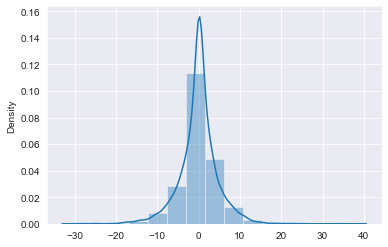

In [74]:
sns.distplot(Residual, bins =15)

### Now we need to make prediction on our model 

In [75]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [76]:
y_test = df_test.pop('Turnout')
X_test = df_test

In [77]:
final_cols = M3.columns

In [78]:
X_test_model3= X_test[final_cols]
X_test_model3.head()

,electors,votes,state_Dadra & Nagar Haveli,state_Daman & Diu,"state_Laccadive, Minicoy And Amindivi Islands",state_Lakshadweep,party_All India Jharkhand Party,party_Ganatantra Parishad,party_Sikkim Democratic Front,party_Sikkim Krantikari Morcha
5172,0.318086,0.412169,0,0,0,0,0,0,0,0
3240,-0.085100,-0.362012,0,0,0,0,0,0,0,0
4256,0.671403,-0.282822,0,0,0,0,0,0,0,0
4219,0.209662,0.260139,0,0,0,0,0,0,0,0
4071,-0.105423,-0.115166,0,0,0,0,0,0,0,0


In [79]:
X_test_sm = sm.add_constant(X_test_model3)

In [80]:
y_pred = model_3.predict(X_test_sm)

In [81]:
y_pred.head()

5172    64.261054
3240    53.469388
4256    39.297199
4219    62.766512
4071    60.089917
dtype: float64

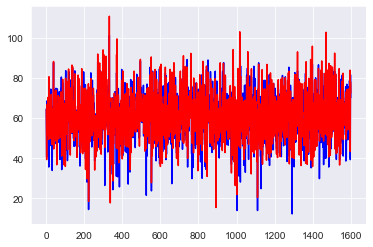

In [82]:
c = [i for i in range(1,1600,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')

Text(0, 0.5, 'y_pred')

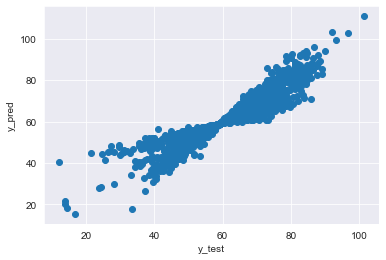

In [83]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

## Model Evaluation 

In [84]:
r2 = r2_score(y_test, y_pred)
r2

0.8677577668185038

In [85]:
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 4.476528725129235
